In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
full_orders = pd.read_csv('../data/full_prod_orders.csv')

In [8]:
insta_palette = ['#ff8200', '#43b02a']
color_label = ['orange', 'green']

c = lambda x: insta_palette[color_label.index(x)]

In [3]:
full_orders.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
0,0,2,33120,1,1,202279,3,5,9,8.0,organic_egg_whites,86,16,dairy_eggs,eggs
1,1,26,33120,5,0,153404,2,0,16,7.0,organic_egg_whites,86,16,dairy_eggs,eggs
2,2,120,33120,13,0,23750,11,6,8,10.0,organic_egg_whites,86,16,dairy_eggs,eggs
3,3,327,33120,5,1,58707,21,6,9,8.0,organic_egg_whites,86,16,dairy_eggs,eggs
4,4,390,33120,28,1,166654,48,0,12,9.0,organic_egg_whites,86,16,dairy_eggs,eggs


In [6]:
# Find the top 10 most popular departments based on items bought per department
x = full_orders.groupby('department_id').product_name.agg('count').nlargest(15)
top10_df = pd.merge(x, full_orders, how='left', on=['department_id', 'department_id'])
top10_df = top10_df.loc[:,['department_id', 'department']]
y = top10_df.groupby('department', as_index=False).agg('count').sort_values(by='department_id', ascending=False)



In [10]:
x_names_dept = ['Produce', 'Dairy & Eggs', 'Snacks', 'Beverages', 'Frozen', 
                'Pantry', 'Bakery', 'Canned Goods', 'Deli', 'Pasta', 'Household',
               'Meat & Seafood', 'Breakfast', 'Personal Care', 'Babies']

<Figure size 432x288 with 0 Axes>

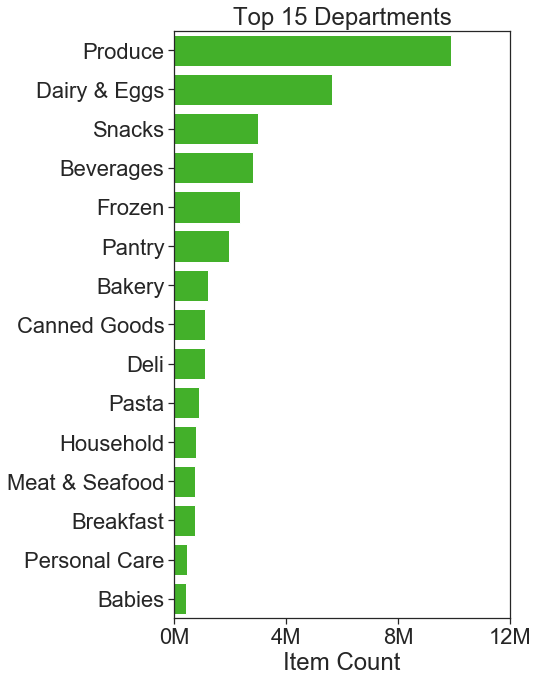

In [21]:
plt.clf()
sns.set_style('ticks')
plt.figure(figsize = (8,10))
g=sns.barplot(y.department_id, y.department,  saturation=1, color=c('green'),)
xlabels = ['{:,.0f}'.format(y) + 'M' for y in g.get_xticks()/1000000]
plt.xticks(g.get_xticks()[0::2],xlabels[0::2])
g.set_yticklabels(x_names_dept)
plt.title('Top 15 Departments')
plt.xlabel('Item Count')
plt.ylabel('')
plt.tight_layout()
plt.savefig('popular_dept_horiz.pdf', format='pdf')